In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps
from scipy import stats
import seaborn as sns
from __future__ import print_function
import urllib3 #  pip install -i https://pypi.anaconda.org/pypi/simple urllib3
import unicodedata
from bs4 import BeautifulSoup, SoupStrainer, Comment
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=ps.read_csv("C:/b/study_in_neu/INFO7390/TrafficAccidentDataset.csv")
df.head(33) #load dataset

,DateOfStop,TimeOfStop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,PersonalInjury,...,Charge,Article,ContributedToAccident,Race,Gender,DriverCity,DriverState,DLState,ArrestType,Geolocation
0,9/24/2013,17:11:00,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,8/29/2017,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/1/2014,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,8/29/2017,9:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,8/28/2017,23:41:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
5,8/27/2013,0:55:00,"2nd district, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,CONNECTICUT/CHEVY CHASE LAKE,NaN,NaN,No,No,No,...,21-901.1(b),Transportation Article,No,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
6,10/8/2013,13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,No,...,13-401(h),Transportation Article,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
7,4/24/2015,0:38:00,"1st district, Rockville",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,EB MONTROSE PKWY/EAST JEFFERSON ST,NaN,NaN,No,No,No,...,21-204(b),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
8,8/28/2017,23:41:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,...,16-112(c),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
9,8/28/2017,23:41:00,"6th district, Gaithersburg / Montgomery Village",DRIVING VEHICLE ON HIGHWAY WITH AN EXPIRED LIC...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,...,16-115(g),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [3]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) #Missing Columns

540

In [4]:
sum(df.isnull().values.ravel()) #Missing Values
df.isnull().sum()

DateOfStop                 0
TimeOfStop                 0
SubAgency                  0
Description                0
Location                   0
Latitude                 440
Longitude                440
Accident                   0
Belts                      0
PersonalInjury             0
PropertyDamage             0
Fatal                      0
CommercialLicense          0
CommercialVehicle          0
Alcohol                    0
WorkZone                   0
State                      0
VehicleType                0
Year                      60
Make                       0
Model                      0
Color                     73
ViolationType              0
Charge                     0
Article                   17
ContributedToAccident      0
Race                       0
Gender                     0
DriverCity                11
DriverState                0
DLState                    8
ArrestType                 0
Geolocation              440
dtype: int64

In [5]:
df[['Year']] = df[['Year']].replace([0, 128, 3003], [np.nan, np.nan, np.nan])
df['State'] = df ['State'].replace(['xx'],[np.nan]) #making unknown null 

In [6]:
#dropping rows for null values
df_nonull = df.dropna() #dropna(axis=1) will drop all col having null dropna(how = 'all') will drop all rows with all null
df_nonull

,DateOfStop,TimeOfStop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,PersonalInjury,...,Charge,Article,ContributedToAccident,Race,Gender,DriverCity,DriverState,DLState,ArrestType,Geolocation
1,8/29/2017,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/1/2014,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,8/29/2017,9:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
6,10/8/2013,13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,No,...,13-401(h),Transportation Article,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
10,2/14/2014,20:10:00,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
11,3/19/2012,16:10:00,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,...,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
12,6/9/2012,21:19:00,"3rd district, Silver Spring",OCCUPANT UNDER 16 NOT RESTRAINED BY SEATBELT,2068 HARLEQUIN TERRACE,39.069143,-76.969678,No,No,No,...,22-412.3(b),Transportation Article,No,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.06914295, -76.9696780666667)"
13,12/20/2012,0:41:00,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
14,7/20/2012,23:12:00,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,...,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
15,9/11/2012,21:47:00,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,TWIG RD AT GOOD HOPE RD,39.096199,-76.986962,No,Yes,No,...,16-303(d),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.09619885, -76.98696215)"


In [7]:
df_make = df['Make']

In [8]:
df_make = df_make.str.replace('ACCUR','ACURA')
df_make = df_make.str.replace('ACC','ACURA')
df_make = df_make.str.replace('BUIC','BUICK')
df_make = df_make.str.replace('CADI','CADILLAC')
df_make = df_make.str.replace('CHEV','CHEVROLET')
df_make = df_make.str.replace('CHEVY','CHEVROLET')
df_make = df_make.str.replace('CHEVORLET','CHEVROLET')
df_make = df_make.str.replace('CHEVRLETE','CHEVROLET')
df_make = df_make.str.replace('CHEVEROLET','CHEVROLET')

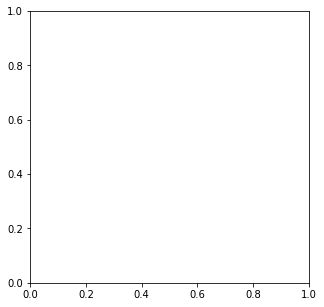

In [9]:
%matplotlib inline 
import numpy as np
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 15) # for larger image
rectImg = (5,5)
fig, ax = plt.subplots(figsize=rectImg)

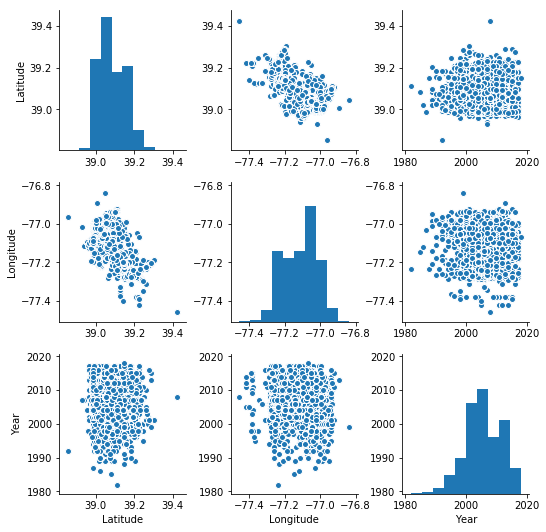

In [11]:
sns.pairplot(df_nonull)
print('Since the data is about MD Traffic Accidents, The outliers are about the location of accidents far from MD by MD drivers')

In [13]:
df_nonull.duplicated() #If dataset has duplicate values

1       False
2       False
3       False
6       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
19      False
21      False
23      False
24      False
25      False
26      False
29      False
30      False
31      False
33      False
34      False
35      False
36      False
37      False
39      False
40      False
41      False
42      False
        ...  
3964    False
3965    False
3966    False
3967    False
3968    False
3969    False
3970    False
3971    False
3972    False
3973    False
3974    False
3975    False
3976    False
3977    False
3978    False
3979    False
3980    False
3981    False
3982    False
3983    False
3984    False
3985    False
3986    False
3987    False
3988    False
3989    False
3990    False
3997    False
3998    False
3999    False
Length: 3456, dtype: bool

Some of the Maryland drivers have met an accident outside the MD state


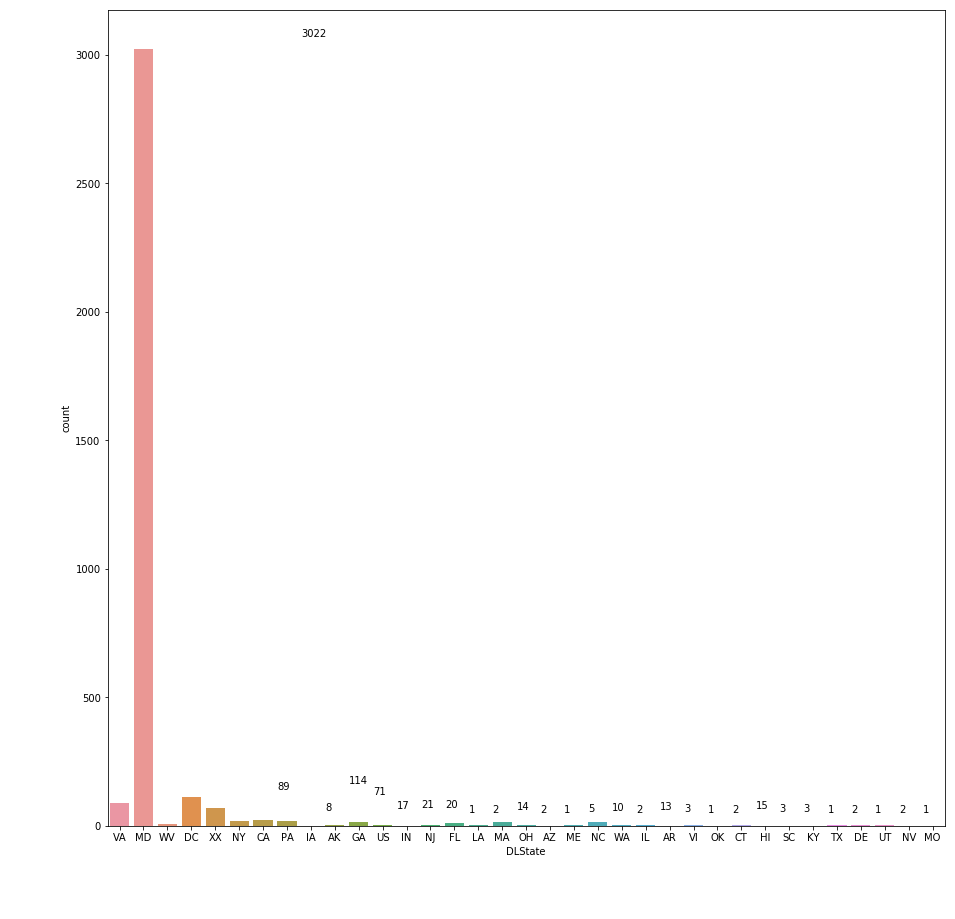

In [16]:
ax = sns.countplot(df_nonull['DLState'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+7, p.get_height()+50))
        
print('Some of the Maryland drivers have met an accident outside the MD state')

Only men driving under alcohol influence had fatality


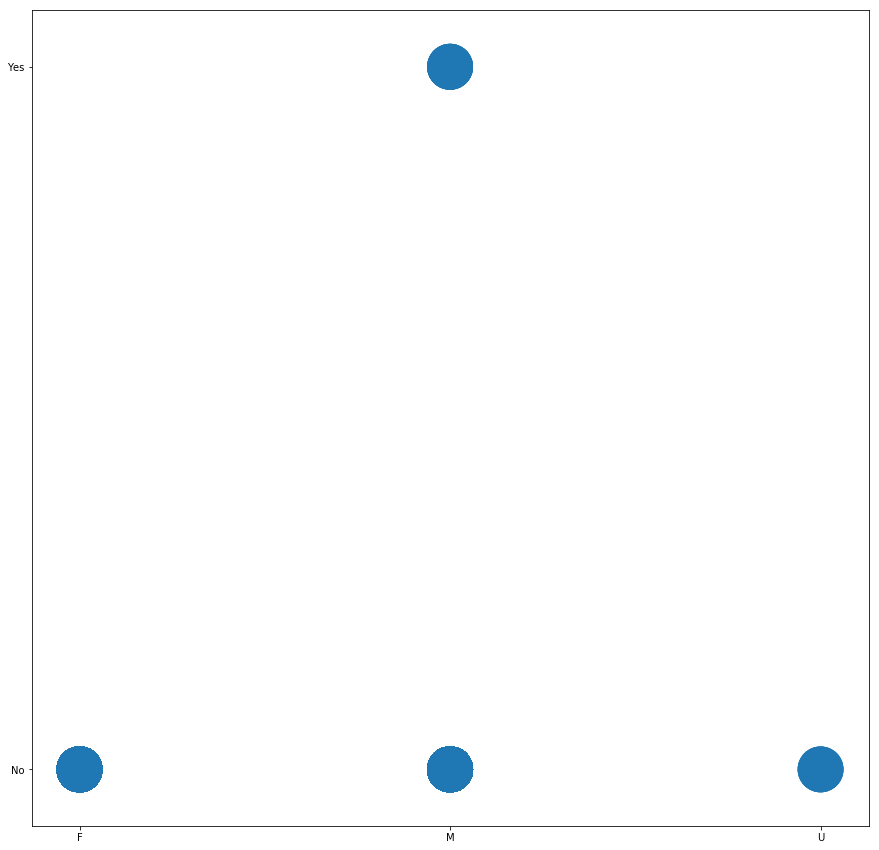

In [18]:
plt.scatter(df_nonull.Gender, df_nonull.Alcohol, df_nonull.Year)
print('Only men driving under alcohol influence had fatality')

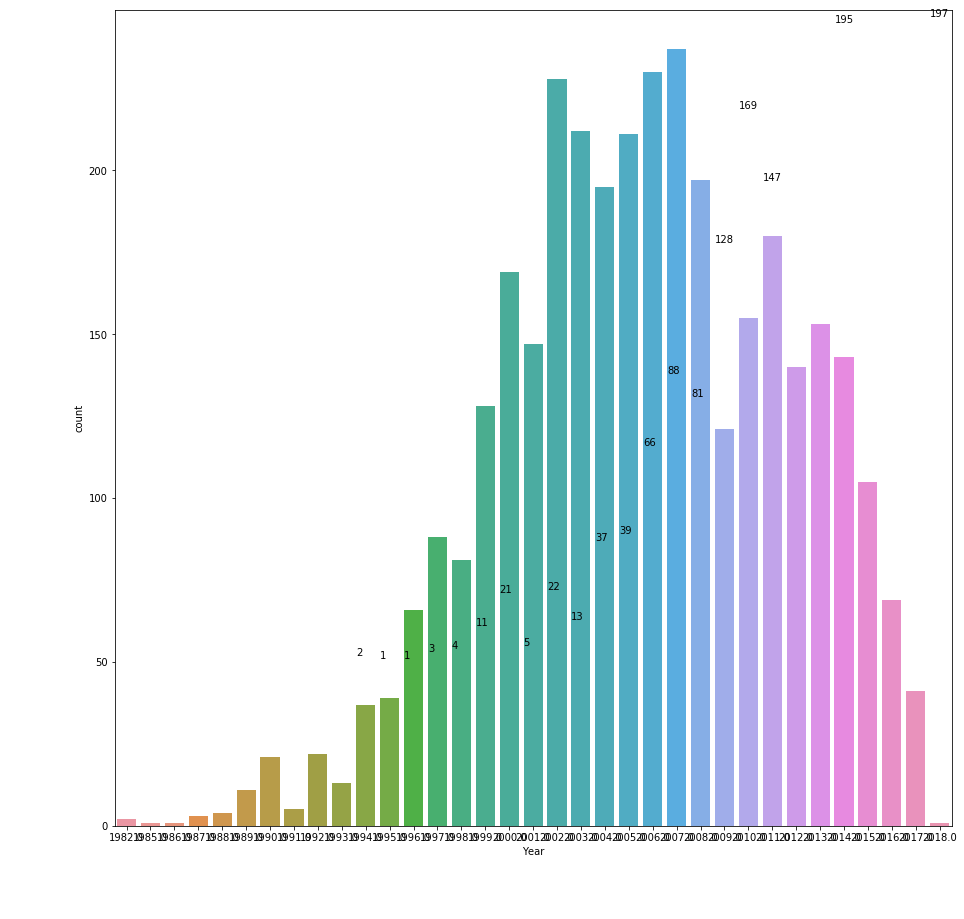

In [20]:
ax = sns.countplot(df_nonull['Year'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+10, p.get_height()+50))